Importing libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Loading two files, `train.csv` and `test.csv`. And combining them together where `'Survived'` column is gone.

In [2]:
#load data
train_data = pd.read_csv('~/Desktop/Kaggle/projects/Titanic_Machine_Learning/train.csv')
test_data = pd.read_csv('~/Desktop/Kaggle/projects/Titanic_Machine_Learning/test.csv')


#print names of columns
print('test_data columns:',test_data.columns.to_list())
print('train_data columns:',train_data.columns.to_list())


#concantinate data together w/o 'Survived' column
data = pd.concat([train_data.drop(columns=['Survived']),test_data]).reset_index().drop(columns=['index'])
data.head()

test_data columns: ['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
train_data columns: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#changed 'Sex' column output from 'male' and 'female' to 0 and 1
train_data['Sex'] = train_data['Sex'].map({'male':0, 'female':1})
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


## Analyzing data

Look through each columns to understand the data.

### `Pclass`

`'Pclass'` is the ticket class for passenger. This column has no null entries, so we do not have to clean this column.

In [43]:
#check if there missing data in 'pclass' column
pclass_missing = train_data.Pclass.isna().sum()
print("Missing data in 'Pclass' column:", pclass_missing)

Missing data in 'Pclass' column: 0


POPULATION %: It looks like that the majority people are third class (55.11%), and the first and second classes have similar number of people (24.24% and 20.65%).

   pclass  percent
0       1    24.24
1       2    20.65
2       3    55.11
AxesSubplot(0.125,0.125;0.775x0.755)


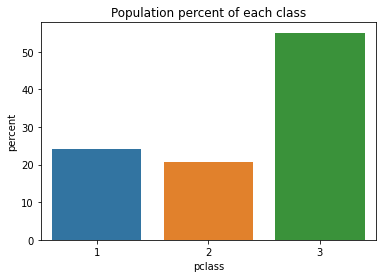

In [4]:
#TABLES
#population percent of each 'Pclass'
pclass_percent = ((train_data.Pclass.value_counts().sort_index()/len(train_data))*100).round(2)

#convert to dataframe
percent_table = pd.DataFrame({'pclass':pclass_percent.index, 'percent':pclass_percent.values})
print(percent_table)


#GRAPH
#title the graph
plt.title('Population percent of each class')

#graph the table above
percent_graph=sns.barplot(x='pclass', y='percent', data=percent_table)
print(percent_graph)

SURVIVAL RATE: The most people survived in 1st class (62.96 %). The least people survived in 3rd class (24.24 %).

   pclass  percent
0       1    62.96
1       2    47.28
2       3    24.24


Text(0.5, 1.0, 'Survival Rate in Each Class')

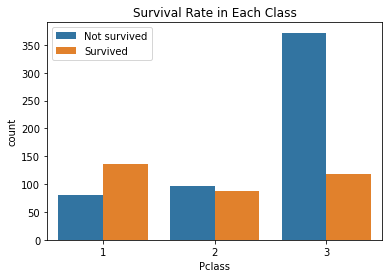

In [5]:
#TABLE
#survival rate in each class
survival_rate = ((train_data.groupby('Pclass').Survived.mean())*100).round(2)

#conver to DataFrame
survival_rate_table=pd.DataFrame({'pclass':survival_rate.index, 'percent':survival_rate.values})
print(survival_rate_table)


#GRAPH
survival_rate_graph = sns.countplot(x='Pclass', hue='Survived', data=train_data)
plt.legend(['Not survived', 'Survived'])
plt.title('Survival Rate in Each Class')

CORRELATION: Survival and class have weak negative correlation of 0.3385.

In [6]:
pclass_correlation = (train_data['Pclass'].corr(train_data['Survived'])).round(4)
print(pclass_correlation)

-0.3385


CONCLUSION:
Eventhough the most population of passengers are 3rd class, the first and second class have better survival rate. Therefore, we must include this column because it has weak correlation between `'Pclass'` and `'Survived'`.

### `Sex`

`'Sex'` is the gender of each passenger. Where 'male'= 0 and 'female' = 1. Also this column does not have Null entries.

In [44]:
#number of missing values in 'Sex' column
sex_missing = train_data.Sex.isna().sum()
print("Missing data in 'Sex' column:", sex_missing)

Missing data in 'Sex' column: 0


POPULATION %: Majority of passengers are males (64.76%).


   sex  percent
0    0    64.76
1    1    35.24
AxesSubplot(0.125,0.125;0.775x0.755)


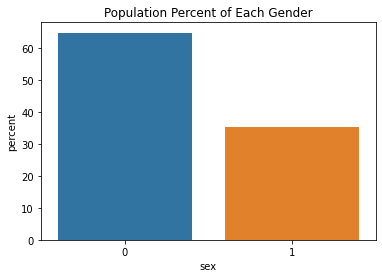

In [7]:
#TABLE
sex_percent = ((train_data.Sex.value_counts()/len(train_data))*100).round(2)

sex_table = pd.DataFrame({'sex': sex_percent.index, 'percent': sex_percent.values})
print(sex_table)


#GRAPH
plt.title('Population Percent of Each Gender')

percent_sex_graph=sns.barplot(x='sex', y='percent', data=sex_table)
print(percent_sex_graph)

SURVIVAL RATE: More females (74.20 %) survided than males (18.89 %) survived.

   sex  percent
0    0    18.89
1    1    74.20


Text(0.5, 1.0, 'Survival Rate in Each Gender')

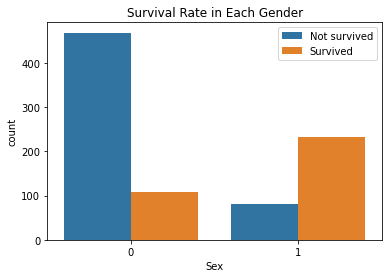

In [12]:
#TABLE
sex_survival_rate = ((train_data.groupby('Sex').Survived.mean())*100).round(2)

sex_survival_rate_table = pd.DataFrame({'sex':sex_survival_rate.index, 'percent':sex_survival_rate.values})
print(sex_survival_rate_table)


#GRAPH
sex_survival_rate_graph = sns.countplot(x='Sex', hue='Survived', data=train_data)
plt.legend(['Not survived', 'Survived'])
plt.title('Survival Rate in Each Gender')

CORRELATION: There exist moderate positive correlation of 0.5434 between `'Sex'` and `'Survived'` columns.

In [36]:
pclass_correlation = (train_data['Sex'].corr(train_data['Survived'])).round(4)
print('Correlation between "Sex" and "Survived":', pclass_correlation)

Correlation between "Sex" and "Survived": 0.5434


CONCLUSION: Eventhough there was more 'males' then 'females' on the ship, 'females' have better survival rate than males. Keep this column because it has positive moderate correlation betweem `'Sex'` and `'Survived'`.

### `Age`

`'Age'` is the age of each passenger.


MISSING DATA: There is 177 rows that have missing entry for `'Age'` column. This means that 19.87% of `'Age'` column data is missing, which is alot. Thus, we need to replace the missing data, so that model would predict better outcome.

In [35]:
#number of entries that have null in 'Age' column.
age_missing = train_data.Age.isna().sum()
print('Missing data in "Age" column:', age_missing)

#calculate percent of missing data
age_missing_percent = ((age_missing/ len(train_data))*100).round(2)
print('Percent of missing data:', age_missing_percent)

Missing data in "Age" column: 177
Percent of missing data: 19.87


DISTRIBUTION WITH OTHER FACTORS: On average the majority of passengers are between 20 and 35 years old. Average age for female is 27.9, and for males is 30.7. The average age of 1st class is 38.2, second class is 29.9, and 3rd class is 25.1.

Text(0.5, 1.0, 'Distribution of Ages')

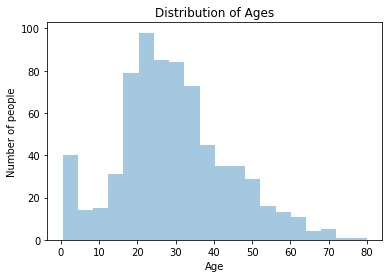

In [80]:
#GRAPH
#average age of passengers
sns.distplot(a=train_data['Age'], kde=False)
plt.ylabel('Number of people')
plt.title('Distribution of Ages')

   sex    age
0    0  30.73
1    1  27.92


Text(0.5, 1.0, 'Age Distribution Based on Sex')

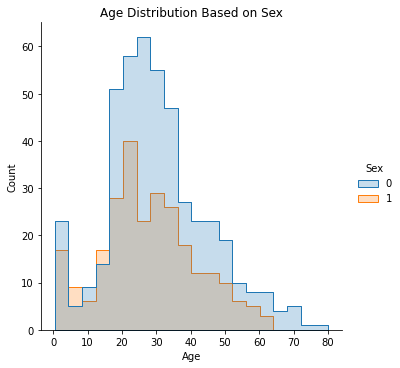

In [54]:
#DATA
#average age by 'Sex'
average_age_sex = (train_data.groupby('Sex').Age.mean()).round(2)
average_age_sex_table = pd.DataFrame({'sex':average_age_sex.index, 'age':average_age_sex.values})
print(average_age_sex_table)

#GRAPH
sns.displot(train_data, x='Age', hue='Sex', element='step')
plt.title('Age Distribution Based on Sex')

   pclass    age
0       1  38.23
1       2  29.88
2       3  25.14


Text(0.5, 1.0, 'Age Distribution Based on Pclass')

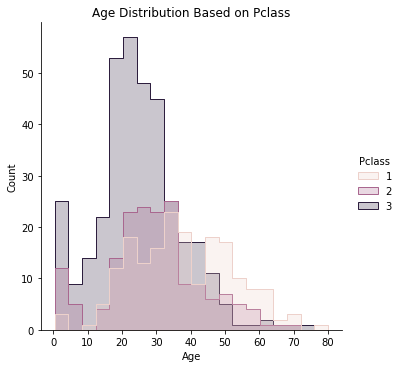

In [61]:
#DATA
#average age by 'Pclass'
average_age_pclass = (train_data.groupby('Pclass').Age.mean()).round(2)
average_age_pclass_table = pd.DataFrame({'pclass':average_age_pclass.index, 'age':average_age_pclass.values})
print(average_age_pclass_table)

#GRAPH
sns.displot(train_data, x='Age', hue='Pclass', element='step')
plt.title('Age Distribution Based on Pclass')

SURVIVAL RATE AND SURVIVAL DISTRIBUTION: By looking at the graphs, the survival rate varies among all ages. The youngest people have higher chance to survive.

    age  percent
0  0.42   100.00
1  0.67   100.00
2  0.75   100.00
3  0.83   100.00
4  0.92   100.00
5  1.00    71.43
6  2.00    30.00
7  3.00    83.33
8  4.00    70.00
9  5.00   100.00


Text(0.5, 1.0, 'Survival Rate Based on Age')

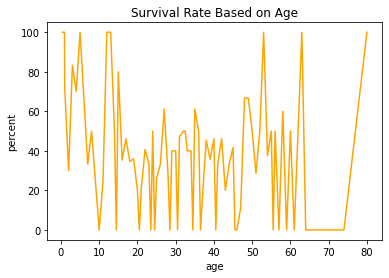

In [99]:
#TABLE
#survival rate of each age
age_survival_rate = ((train_data.groupby('Age').Survived.mean())*100).round(2)
age_survival_rate_table = pd.DataFrame({'age':age_survival_rate.index, 'percent':age_survival_rate.values})
print(age_survival_rate_table.head(10))


#GRAPH
sns.lineplot(data=age_survival_rate_table, x='age', y='percent', color='orange')
plt.title("Survival Rate Based on Age")

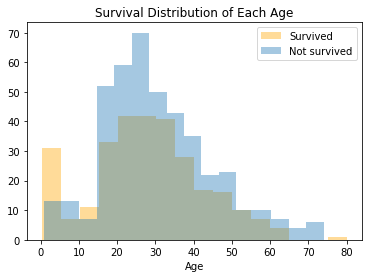

In [95]:
#GRAPH
#survaval distribution of each age
survived = (train_data.Survived == 1)
not_survived = (train_data.Survived == 0)

sns.distplot(a=train_data[survived].Age, color='orange', kde=False)
sns.distplot(a=train_data[not_survived].Age, kde=False)
plt.title('Survival Distribution of Each Age')
plt.legend(['Survived', 'Not survived'])

CORRELATION: The correlation is -0.0772, which is almost 0. Thus, there is almost no correlation between `'Age'` and `'Survived'` columns.

In [100]:
age_correlation = (train_data['Age'].corr(train_data['Survived'])).round(4)
print('Correlation between "Age" and "Survived":', age_correlation)

Correlation between "Age" and "Survived": -0.0772


CONCLUSION: Alot of `'Age'` data is missing, so it is need to be fixed. The overal correlation between `'Age'` and `'Survived'` is very small, such that young people have better chance to survive.

### `SibSp`

`'SibSp'` is the number of siblings and spouses the the passenget travelling with.

MISSING DATA: There is no missing data in this column.

In [101]:
#check if there missing data in 'SibSp' column
sibsp_missing = train_data.SibSp.isna().sum()
print("Missing data in 'SibSp' column:", sibsp_missing)

Missing data in 'Pclass' column: 0
